# Assignment 1

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Solve household problem](#toc2_)    
- 3. [Find stationary equilibrium](#toc3_)    
  - 3.1. [Direct approach](#toc3_1_)    
  - 3.2. [Looking at the stationary equilibrium](#toc3_2_)    
    - 3.2.1. [Policy functions](#toc3_2_1_)    
    <!-- - 3.2.2. [Distributions](#toc3_2_2_)     -->
  <!-- - 3.3. [Indirect approach](#toc3_3_)     -->
- 4. [Calculating the Jacobians](#toc4_)
	- 4.1 [The Jacobians](#toc4_1_)
- 5. [Finding transitionpath](#toc5_)
	- 5.1 [Temporary shock to $\varphi_1$](#toc5_1)
	- 5.2 [Permanent shock to $\varphi_2$](#toc5_2)
<!-- - 6. [Extra: Demand vs. supply of capital](#toc6_)     -->

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [378]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCModel import HANCModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [379]:
model = HANCModelClass(name='baseline')

par = model.par
ss = model.ss

## 2. <a id='toc2_'></a>[Solve household problem](#toc0_)

Set the steady state values, which matter for the household:

In [380]:
ss.r = 0.01
ss.w0 = 1.00
ss.w1 = 1.00
ss.phi0 = 1.0
ss.phi1 = 2.0

**Solve the household problem** with `.solve_hh_ss()`:
    
1. Calls `.prepare_hh_ss()`
1. Calls `.solve_backwards_hh()` until convergence

In [381]:
# Solving household problem with different values for beta and eta
model.solve_hh_ss(do_print=True)

household problem in ss solved in 7.1 secs [52 iterations]


In [382]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 1.6 secs [2 iterations]


## 3. <a id='toc3_'></a>[Find stationary equilibrium](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Direct approach](#toc0_)

In [383]:
model.find_ss(method='direct',do_print=True)

### step 1: broad search ###

guess ss.K = 1.0000
implied ss.r = 0.1777
implied ss.w0 = 0.8821
implied ss.w1 = 0.8821
household problem in ss solved in 0.7 secs [618 iterations]
household problem in ss simulated in 0.0 secs [341 iterations]
implied ss.A_hh = 452.4769
clearing_A = -451.47692574

guess ss.K = 2.0000
implied ss.r = 0.0782
implied ss.w0 = 1.1321
implied ss.w1 = 1.1321
household problem in ss solved in 0.3 secs [265 iterations]
household problem in ss simulated in 0.0 secs [177 iterations]
implied ss.A_hh = 0.1197
clearing_A =   1.88026271

guess ss.K = 3.0000
implied ss.r = 0.0375
implied ss.w0 = 1.3100
implied ss.w1 = 1.3100
household problem in ss solved in 0.1 secs [112 iterations]
household problem in ss simulated in 0.0 secs [63 iterations]
implied ss.A_hh = 0.0009
clearing_A =   2.99907467

guess ss.K = 4.0000
implied ss.r = 0.0144
implied ss.w0 = 1.4530
implied ss.w1 = 1.4530
household problem in ss solved in 0.1 secs [56 iterations]
household problem in ss simulate

**Look at the steady state variables:**

In [384]:
for varname in model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

Gamma          : 1.0000
K              : 1.6173
L0             : 0.6667
L1             : 0.6667
rK             : 0.2042
Y              : 1.3036
w0             : 1.0487
w1             : 1.0487
A              : 1.6173
r              : 0.1042
phi0           : 1.0000
phi1           : 2.0000
A_hh           : 1.6173
C_hh           : 1.4051
L0_hh          : 0.6667
L1_hh          : 0.6667
U_hh           : -0.0153
I              : 0.1617
clearing_A     : 0.0000
clearing_L     : 0.0000
clearing_Y     : -0.2632


In [385]:
model.info(only_blocks=True,ss=True)

production_firm: [Gamma=1.00,K=1.62,L0=0.67,L1=0.67] -> [rK=0.20,Y=1.30,w0=1.05,w1=1.05]
mutual_fund: [K=1.62,rK=0.20] -> [A=1.62,r=0.10]
hh: [phi0=1.00,phi1=2.00,r=0.10,w0=1.05,w1=1.05] -> [A_hh=1.62,C_hh=1.41,L0_hh=0.67,L1_hh=0.67,U_hh=-0.02]
market_clearing: [A=1.62,A_hh=1.62,L0=0.67,L1=0.67,L0_hh=0.67,L1_hh=0.67,Y=1.30,C_hh=1.41,K=1.62] -> [I=0.16,clearing_A=0.00,clearing_L=0.00,clearing_Y=-0.26]


In [386]:
model.test_path()

shocks: Gamma phi0 phi1 
unknowns: K L0 L1 

look at max(abs(path.VARNAME[:]-ss.VARNAME)):

 blocks.production_firm
  rK               0.0e+00
  Y                0.0e+00
  w0               0.0e+00
  w1               0.0e+00
 blocks.mutual_fund
  A                0.0e+00
  r                0.0e+00
 hh
  A_hh             2.4e-09
  C_hh             8.9e-11
  L0_hh            2.0e-15
  L1_hh            1.6e-15
  U_hh             2.6e-13
 blocks.market_clearing
  I                1.1e-16
  clearing_A       2.4e-09 [target]
  clearing_L       1.4e-14 [target]
  clearing_Y       2.6e-01 [target]


In [387]:
model.test_ss(do_warnings=True)

Gamma          :       1.0000
K              :       1.6173
L0             :       0.6667
L1             :       0.6667
rK             :       0.2042
Y              :       1.3036
w0             :       1.0487
w1             :       1.0487
A              :       1.6173
r              :       0.1042
phi0           :       1.0000
phi1           :       2.0000
A_hh           :       1.6173
C_hh           :       1.4051
L0_hh          :       0.6667
L1_hh          :       0.6667
U_hh           :      -0.0153
I              :       0.1617
clearing_A     :       0.0000
clearing_L     :       0.0000
clearing_Y     :      -0.2632


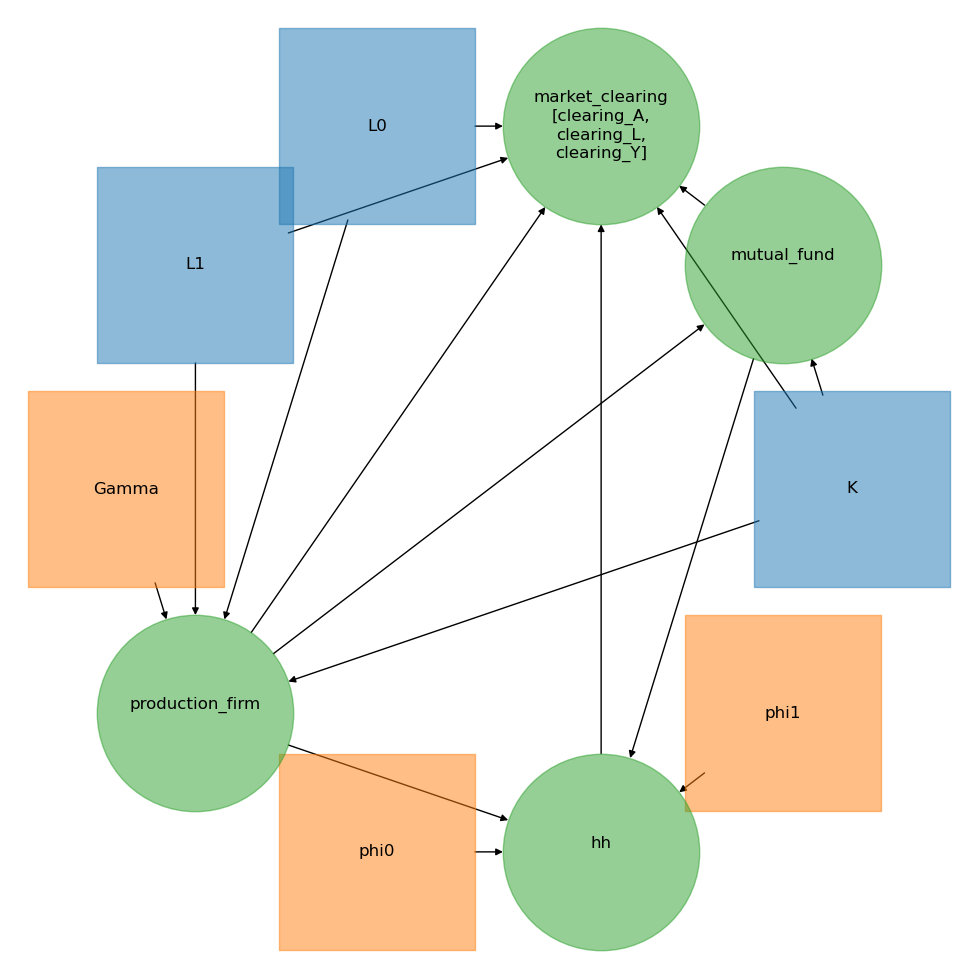

In [388]:
model.draw_DAG(figsize=(10,10))

### 3.2. <a id='toc3_2_'></a>[Looking at the stationary equilibrium](#toc0_)

#### 3.2.1. <a id='toc3_2_1_'></a>[Policy functions](#toc0_)

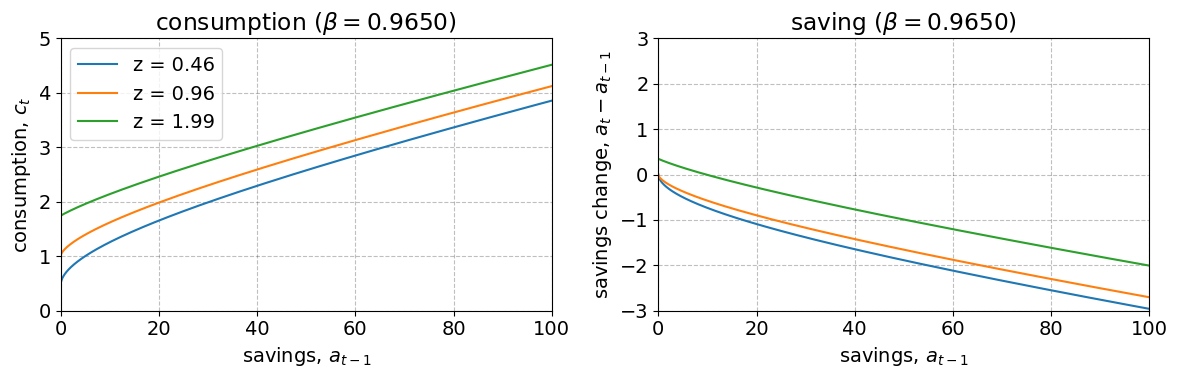

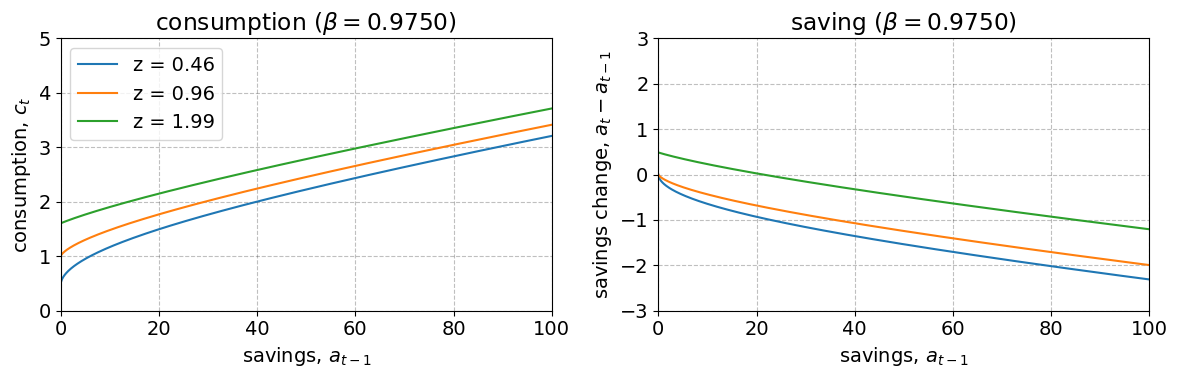

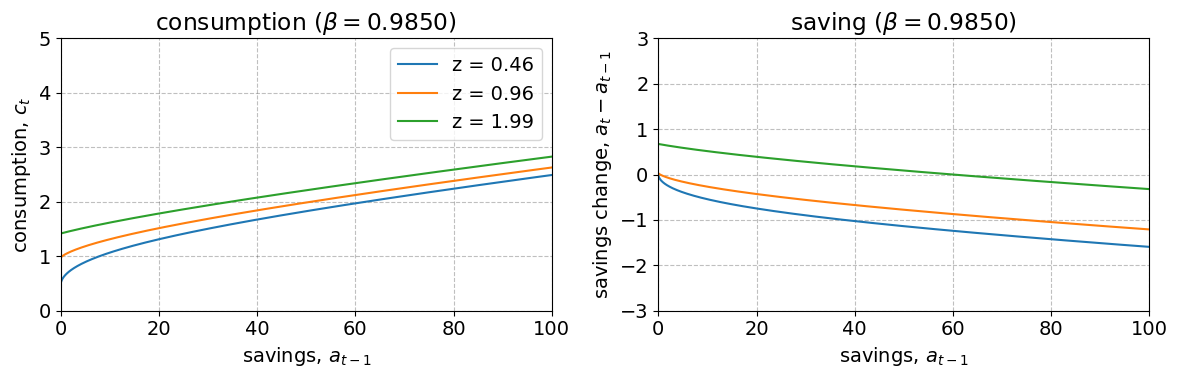

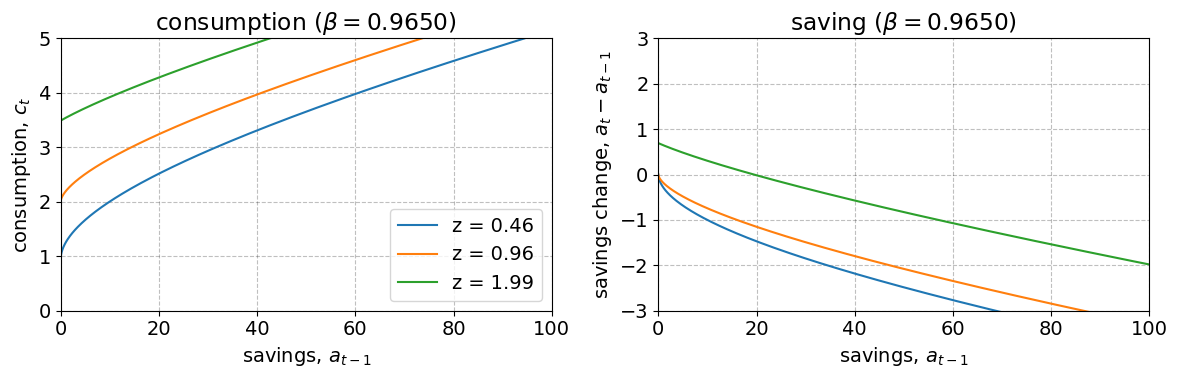

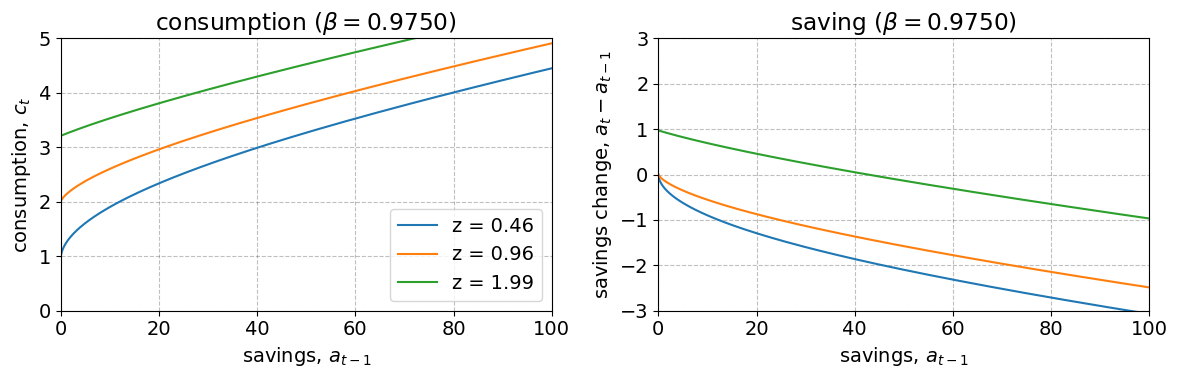

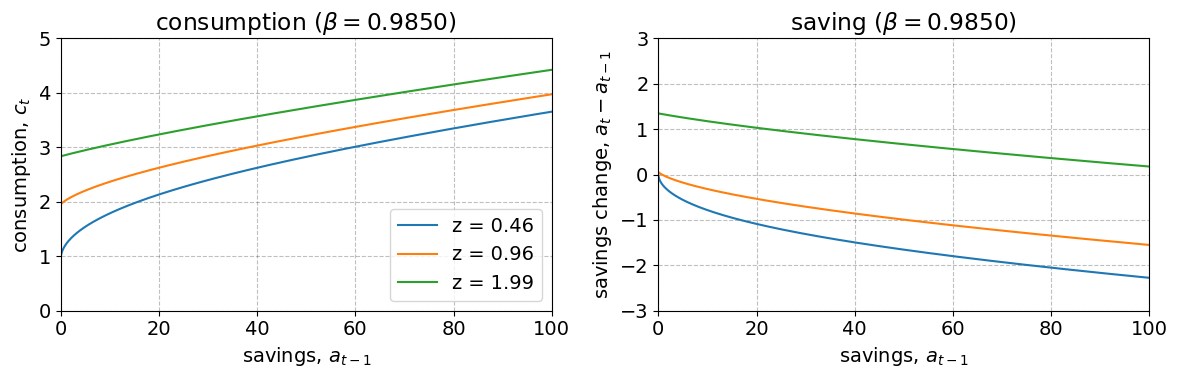

In [389]:
# Loop over beta values
for i_beta, beta in enumerate(par.beta_grid):

    fig = plt.figure(figsize=(12,4),dpi=100)
    I = par.a_grid < 500
    
    # a. consumption
    ax = fig.add_subplot(1,2,1)
    ax.set_title(f'consumption ($\\beta = {beta:.4f}$)')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I], ss.c[i_beta, i_z, I], label=f'z = {z:.2f}')
            
    ax.legend(frameon=True)
    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('consumption, $c_t$')
    ax.set_xlim(0,100)
    ax.set_ylim(0,5)

    # b. saving
    ax = fig.add_subplot(1,2,2)
    ax.set_title(f'saving ($\\beta = {beta:.4f})$')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I], ss.a[i_beta, i_z, I] - par.a_grid[I], label=f'z = {z:.2f}')

    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')
    ax.set_xlim(0,100)
    ax.set_ylim(-3,3)

    fig.tight_layout()
    fig.savefig(f'figs/c_func_{i_beta}.pdf')

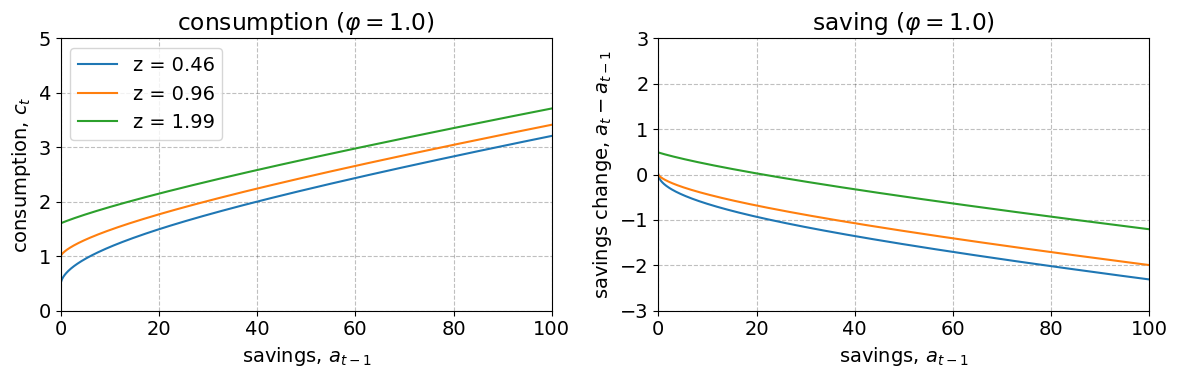

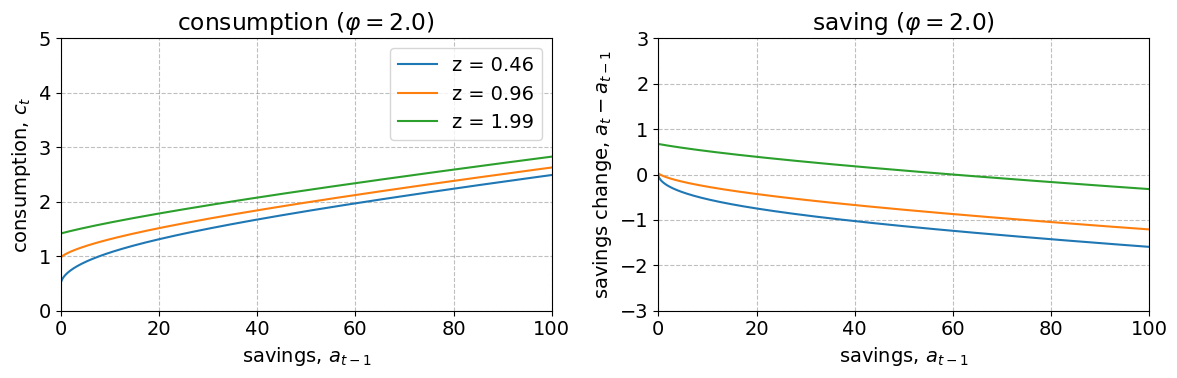

In [390]:
# Loop over phi values
for phi in [1,2]:

    fig = plt.figure(figsize=(12,4),dpi=100)
    I = par.a_grid < 500
    
    # a. consumption
    ax = fig.add_subplot(1,2,1)
    ax.set_title(f'consumption ($\\varphi = {phi:.1f}$)')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I], ss.c[phi, i_z, I], label=f'z = {z:.2f}')
            
    ax.legend(frameon=True)
    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('consumption, $c_t$')
    ax.set_xlim(0,100)
    ax.set_ylim(0,5)

    # b. saving
    ax = fig.add_subplot(1,2,2)
    ax.set_title(f'saving ($\\varphi = {phi:.1f})$')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I], ss.a[phi, i_z, I] - par.a_grid[I], label=f'z = {z:.2f}')

    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')
    ax.set_xlim(0,100)
    ax.set_ylim(-3,3)

    fig.tight_layout()
    fig.savefig(f'figs/c_func_{phi}.pdf')

## 4. <a id='toc3_2_'></a>[Calculating the Jacobians](#toc0_)

In [391]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for phi0            in 1.0 secs
curly_Y and curly_D calculated for phi1            in 1.0 secs
curly_Y and curly_D calculated for r               in 1.1 secs
curly_Y and curly_D calculated for w0              in 1.0 secs
curly_Y and curly_D calculated for w1              in 1.1 secs
curly_E calculated in 0.6 secs
builiding blocks combined in 1.6 secs
household Jacobian computed in 7.4 secs

full Jacobians:
full Jacobian to unknowns computed in 1.2 secs [in evaluate_blocks(): 0.5 secs]
full Jacobian to shocks computed in 1.2 secs [in evaluate_blocks(): 0.5 secs]


### 4.1. <a id='toc3_2_'></a>[The Jacobians](#toc0_)

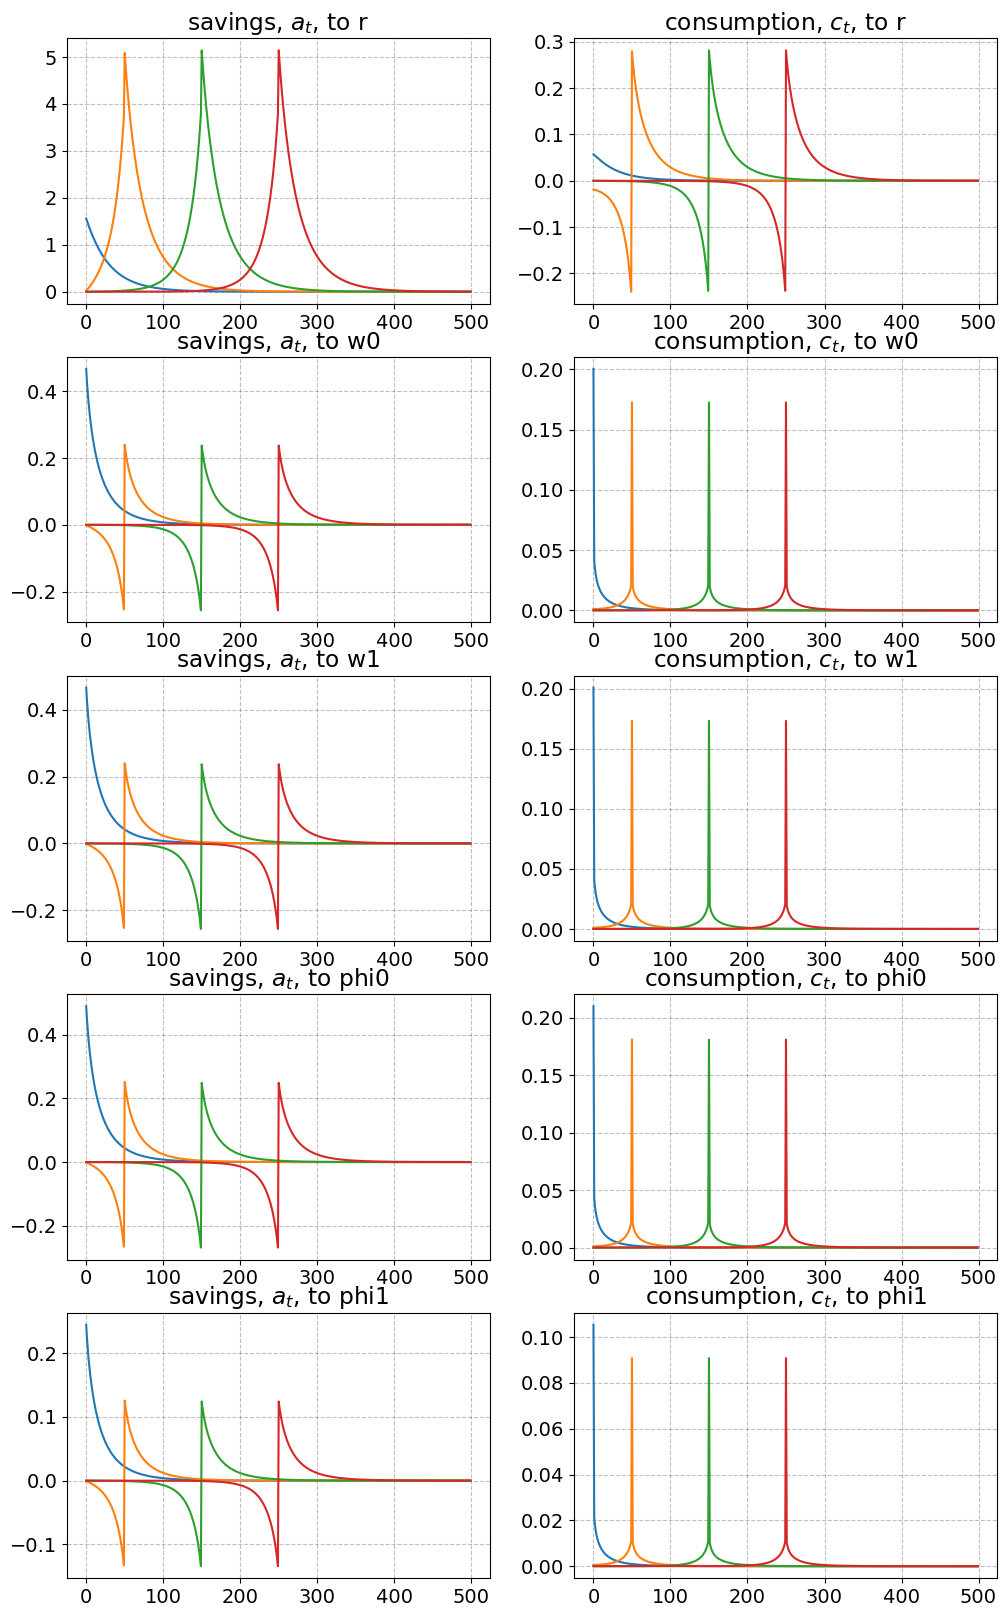

In [392]:
fig = plt.figure(figsize=(12,len(model.inputs_hh_all)*4),dpi=100)

i = 0
for varname in model.inputs_hh[:5]:
    
    # a. savings
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'savings, $a_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('A_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')
    
        # ax.legend(frameon=True,bbox_to_anchor=(0.0,0.0))

    # b. consumption
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'consumption, $c_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('C_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')

## 5. <a id='toc3_2_'></a>[Finding transitionpath](#toc0_)
### 5.1 <a id='toc3_2_'></a>[Temporary shock to $\varphi_1$](#toc0_)

In [393]:
# find transition path
model.find_transition_path(shocks=['phi1'],do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 2.83e-01
   7.78e-02 in clearing_A
   3.33e-02 in clearing_L
   2.83e-01 in clearing_Y
clearing_A: terminal value is  -0.00000002, but ss value is   0.00000000

transition path found in 1.7 secs


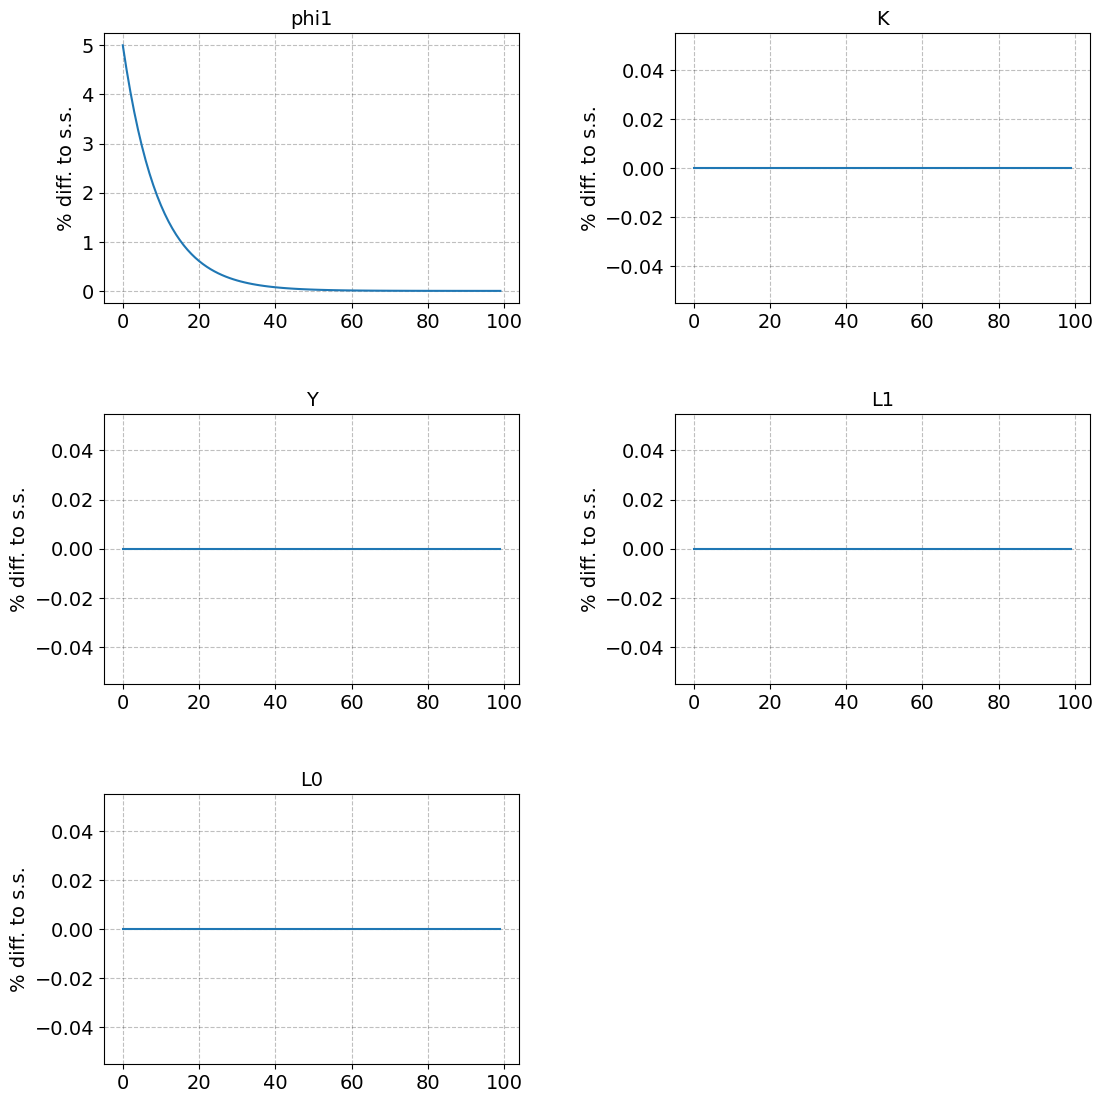

In [394]:
model.show_IRFs(['phi1','K','Y','L1','L0'],T_max=100,do_shocks=False,do_targets=False,ncols=2,filename='figs/10_period_phi1_shock')

### 5.2 <a id='toc3_2_'></a>[Permanent shock to $\varphi_1$](#toc0_)

A_hh: terminal value is   1.61738667, but ss value is   1.61725075
clearing_A: terminal value is  -0.00013592, but ss value is   0.00000000
clearing_Y: terminal value is  -0.26320959, but ss value is  -0.26320467


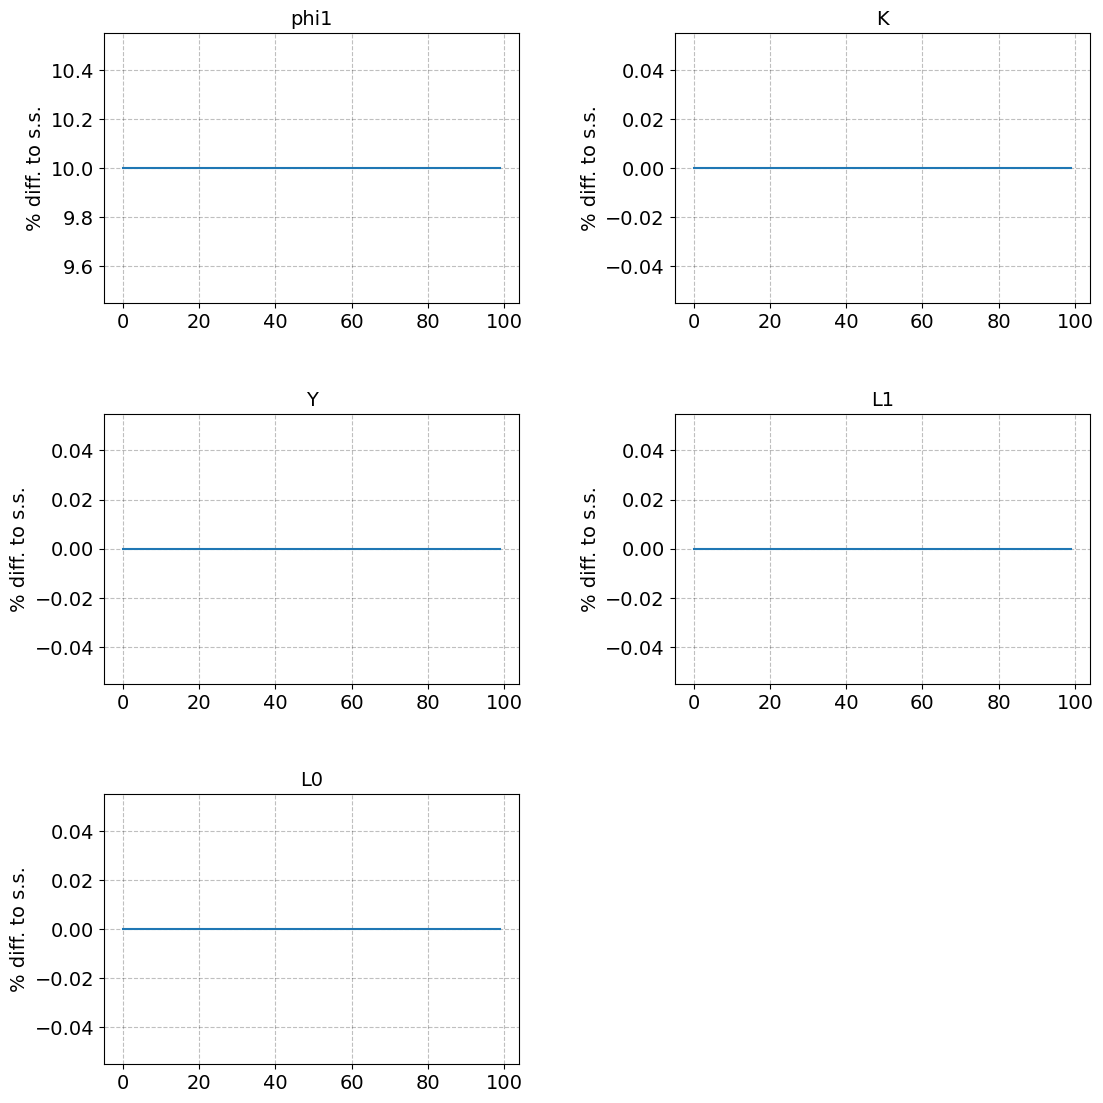

In [395]:
# a. define shock
dphi1 = np.zeros(par.T)
dphi1[:] = 0.1*ss.phi1
shocks = {'dphi1':dphi1} # note the 'd' for difference (in absolute terms)

# b. find transition path
model.find_transition_path(do_print=False,shocks=shocks)

model.show_IRFs(['phi1','K','Y','L1','L0'],T_max=100,do_shocks=False,do_targets=False,ncols=2,filename='figs/phi1_shock')